In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-08-28 19:03:15.009465: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_mean_5x5_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10232  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10233  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10234  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10235  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10236  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.249603   
1      4.113529  4.223896  63.821798  62.581992  ...           112.249603   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.653595   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.653595   
4      4.405489  4.587935  60.655199  58.351445  ...            56.127365   
...         ...       ...        ...        ...  ...                  ...   
10232  4.346215  4.374028  86.797202  86.444072  ...           -13.364399   
10233  4.236066  4.264247  89.521652  89.357990  ...           105.171204   
10234  4.237512  4.264786  90.106352  89.978233  ...           105.171204   
10235  3.745458  3.792684  82.634552  82.112733  ...          -145.023331   
10236  3.823687  3.867705  84.046602  83.596072  ...          -145.994003   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.423599           22.733597            61.804001   
1               67.423599           22.733597            61.804001   
2              -98.687996          -52.725197            57.520401   
3              -98.687996          -52.725197            57.520401   
4              101.555267          146.867874            37.611580   
...                   ...                 ...                  ...   
10232          -57.949600         -102.685593            58.943199   
10233           60.502396           15.765201            52.536400   
10234           60.502396           15.765201            52.536400   
10235          -99.184174          -53.324581            52.092915   
10236         -100.172394          -54.281200            51.374004   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.659599           61.663998    20180403T030600Z   
1               50.659599           61.663998    20180403T030600Z   
2               46.046001           57.409599    20180404T042700Z   
3               46.046001           57.409599    20180404T042700Z   
4               28.146317           37.577892    20180404T175400Z   
...                   ...                 ...                 ...   
10232           47.901997           59.058002    20200121T132400Z   
10233           41.588398           52.486000    20200121T200600Z   
10234           41.588398           52.486000    20200121T200600Z   
10235           41.176250           51.997086    20200121T214800Z   
10236           40.379200           51.017601    20200121T221800Z   

             stop_sensing_time       u10       v10  
0      20180403T044758.125000Z -4.214585  3.935597  
1      20180403T044758.125000Z -3.485326  3.685807  
2      20180404T060858.125000Z  0.053796  2.618398  
3      20180404T060858.125000Z  1.969399  1.141287  
4      20180404T193258.125000Z  4.476319  0.497334  
...                        ...       ...       ...  
10232  20200121T150558.125000Z  9.854824 -1.954211  
10233  20200121T214758.125000Z  7

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10232  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10233  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10234  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10235  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10236  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.249603   
1      4.113529  4.223896  63.821798  62.581992  ...           112.249603   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.653595   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.653595   
4      4.405489  4.587935  60.655199  58.351445  ...            56.127365   
...         ...       ...        ...        ...  ...                  ...   
10232  4.346215  4.374028  86.797202  86.444072  ...           -13.364399   
10233  4.236066  4.264247  89.521652  89.357990  ...           105.171204   
10234  4.237512  4.264786  90.106352  89.978233  ...           105.171204   
10235  3.745458  3.792684  82.634552  82.112733  ...          -145.023331   
10236  3.823687  3.867705  84.046602  83.596072  ...          -145.994003   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.423599           22.733597            61.804001   
1               67.423599           22.733597            61.804001   
2              -98.687996          -52.725197            57.520401   
3              -98.687996          -52.725197            57.520401   
4              101.555267          146.867874            37.611580   
...                   ...                 ...                  ...   
10232          -57.949600         -102.685593            58.943199   
10233           60.502396           15.765201            52.536400   
10234           60.502396           15.765201            52.536400   
10235          -99.184174          -53.324581            52.092915   
10236         -100.172394          -54.281200            51.374004   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.659599           61.663998    20180403T030600Z   
1               50.659599           61.663998    20180403T030600Z   
2               46.046001           57.409599    20180404T042700Z   
3               46.046001           57.409599    20180404T042700Z   
4               28.146317           37.577892    20180404T175400Z   
...                   ...                 ...                 ...   
10232           47.901997           59.058002    20200121T132400Z   
10233           41.588398           52.486000    20200121T200600Z   
10234           41.588398           52.486000    20200121T200600Z   
10235           41.176250           51.997086    20200121T214800Z   
10236           40.379200           51.017601    20200121T221800Z   

             stop_sensing_time       u10       v10  
0      20180403T044758.125000Z -4.214585  3.935597  
1      20180403T044758.125000Z -3.485326  3.685807  
2      20180404T060858.125000Z  0.053796  2.618398  
3      20180404T060858.125000Z  1.969399  1.141287  
4      20180404T193258.125000Z  4.476319  0.497334  
...                        ...       ...       ...  
10232  20200121T150558.125000Z  9.854824 -1.954211  
10233  20200121T214758.125000Z  7

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
9257   0.009445 -0.223930  368.330000  2467.889749  1004.319904  1005.502499   
8395  -0.012150 -0.032903  242.930000  2491.961292  1003.458436  1004.711499   
9708   0.078067 -0.018678  339.900002  2482.343578   997.998447   999.212497   
6065  -0.128274  0.046309  387.440004  2463.306164  1006.095211  1007.262000   
2595  -0.179591 -0.043724  347.569998  2479.266177  1017.744676  1018.979007   
...         ...       ...         ...          ...          ...          ...   
7832  -0.012150 -0.032903  303.869997  2491.216869  1016.500459  1017.762000   
9509   0.027877 -0.018253  282.675000  2476.474498  1007.622511  1008.836002   
2283  -0.175301  0.137656  245.100003  2483.387743  1013.904479  1015.144501   
10196  0.078067 -0.018678  237.470000  2491.778981   987.942744   989.174500   
8799  -0.012150 -0.032903  334.904999  2484.869669  1015.881696  1017.118515   

             Q10       Qair         RH       RH10  ...  azi_angle_trip_fore  \
9257   10.087346  10.059085  93.192299  93.091379  ...           -24.313200   
8395    1.993027   2.097588  53.029354  50.942458  ...           101.003601   
9708    5.525756   5.563471  87.375103  87.114272  ...           -17.679602   
6065   13.237084  13.047536  94.486750  94.326258  ...           115.321251   
2595    6.425239   6.437436  98.209601  98.453272  ...            53.173603   
...          ...        ...        ...        ...  ...                  ...   
7832    2.865488   2.945332  67.428553  66.121844  ...          -146.748886   
9509    5.837219   5.914002  77.704351  76.924217  ...            52.346001   
2283    3.383261   3.524088  62.881447  60.933615  ...          -145.205887   
10196   3.335486   3.381107  82.814102  82.410851  ...            57.939198   
8799    5.422938   5.457181  88.496954  88.013155  ...            52.045601   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
9257           -69.103607         -114.089203            62.111202   
8395            56.375999           11.841200            60.783604   
9708           -62.371197         -107.018799            44.846397   
6065            70.448746           25.527498            51.720619   
2595            99.217598          145.127594            54.383598   
...                   ...                 ...                  ...   
7832          -100.959999          -55.226669            47.681664   
9509            98.371193          144.350800            56.206802   
2283           -99.535881          -53.814705            52.478233   
10196          103.273590          148.677185            36.909996   
8799            98.068398          144.012390            56.313202   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
9257            51.068798           62.259598    20181103T150000Z   
8395            49.688000           60.673195    20210417T203000Z   
9708            34.532398           44.847198    20190920T134500Z   
6065            41.042500           51.673748    20170623T234200Z   
2595            43.041603           54.394398    20160726T121800Z   
...                   ...                 ...                 ...   
7832            36.988888           47.563335    20210120T221200Z   
9509            44.702805           55.981197    20190815T121500Z   
2283            41.605289           52.386471    20180120T003300Z   
10196           27.480000           36.653198    20200115T124200Z   
8799            44.939598           56.350796    20210619T105100Z   

             stop_sensing_time        u10        v10  
9257   20181103T163858.125000Z  -0.755582   0.757386  
8395   20210417T221158.125000Z  -2.999176   7.157682  
9708   20190920T152358.125000Z   3.946366   4.360535  
6065   20170624T012358.125000Z   0.699922  -0.666925  
2595   20160726T135958.125000Z   6.984790   4.315755  
...                        ...        ...        ...  
7832   20210120T235358.125000Z  -8.912508 -12.06

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

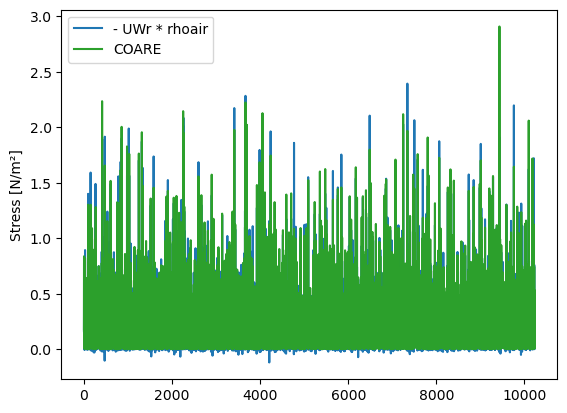

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

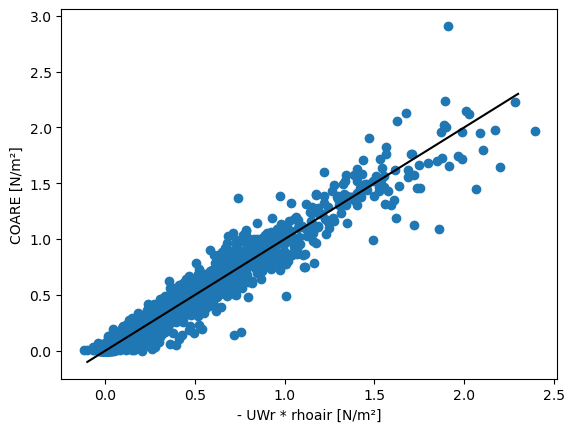

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10237, 67)

In [13]:
df.shape[0]*0.8

8189.6

In [14]:
split_idx = int(df.shape[0]*0.8)
split_idx

8189

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

sigma0_trip_fore  sigma0_trip_mid  sigma0_trip_aft  \
9257         -22.427858       -20.442966       -19.483723   
8395         -17.366703       -15.466944       -20.907032   
9708         -10.550303        -9.605729       -14.743131   
6065         -18.686918       -13.645356       -15.118473   
2595         -23.973274       -21.093224       -27.444519   
...                 ...              ...              ...   
7832         -13.167881       -10.425708       -16.149605   
9509         -18.127966       -19.334070       -19.413429   
2283         -18.266161       -13.723866       -16.604696   
10196        -15.949467        -8.839930       -16.421995   
8799         -33.010746       -26.239626       -29.481743   

       azi_angle_trip_fore  azi_angle_trip_mid  azi_angle_trip_aft  \
9257            -24.313200          -69.103607         -114.089203   
8395            101.003601           56.375999           11.841200   
9708            -17.679602          -62.371197         -107.018799   
6065            115.321251           70.448746           25.527498   
2595             53.173603           99.217598          145.127594   
...                    ...                 ...                 ...   
7832           -146.748886         -100.959999          -55.226669   
9509             52.346001           98.371193          144.350800   
2283           -145.205887          -99.535881          -53.814705   
10196            57.939198          103.273590          148.677185   
8799             52.045601           98.068398          144.012390   

       inc_angle_trip_fore  inc_angle_trip_mid  inc_angle_trip_aft        u10  \
9257             62.111202           51.068798           62.259598  -0.755582   
8395             60.783604           49.688000           60.673195  -2.999176   
9708             44.846397           34.532398           44.847198   3.946366   
6065             51.720619           41.042500           51.673748   0.699922   
2595             54.383598           43.041603           54.394398   6.984790   
...                    ...                 ...                 ...        ...   
7832             47.681664           36.988888           47.563335  -8.912508   
9509             56.206802           44.702805           55.981197  10.941633   
2283             52.478233           41.605289           52.386471   0.494966   
10196            36.909996           27.480000           36.653198   8.277541   
8799             56.313202           44.939598           56.350796  -0.051421   

             v10  
9257    0.757386  
8395    7.157682  
9708    4.360535  
6065   -0.666925  
2595    4.315755  
...          ...  
7832  -12.061374  
9509   -0.284863  
2283    1.721997  
10196  14.570105  
8799   -4.601151  

[10237 rows x 11 columns]

In [17]:
y = - df['UWr'] * df['rhoair']
y

9257     0.163978
8395     0.278788
9708     0.769956
6065     0.162421
2595     0.030023
           ...   
7832     0.481973
9509     0.217317
2283     0.181099
10196    0.108432
8799     0.007445
Length: 10237, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

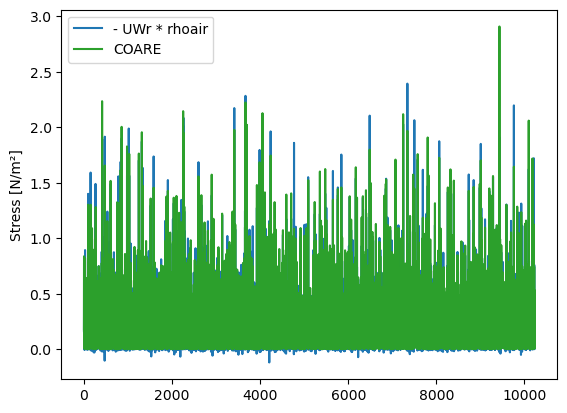

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-08-28 19:03:18.430269: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-28 19:03:18.430552: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-28 19:03:18.430561: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-28 19:03:18.430585: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2023-08-28 19:03:18.430821: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

180/180 [==============================] - 1s 3ms/step - loss: 2.6956 - mean_absolute_error: 1.1636 - val_loss: 2.1153 - val_mean_absolute_error: 1.0247
Epoch 2/500
180/180 [==============================] - 0s 648us/step - loss: 1.9488 - mean_absolute_error: 0.9550 - val_loss: 1.7508 - val_mean_absolute_error: 0.9087
Epoch 3/500
180/180 [==============================] - 0s 637us/step - loss: 1.6445 - mean_absolute_error: 0.8441 - val_loss: 1.5507 - val_mean_absolute_error: 0.8357
Epoch 4/500
180/180 [==============================] - 0s 669us/step - loss: 1.3977 - mean_absolute_error: 0.7815 - val_loss: 1.4119 - val_mean_absolute_error: 0.7793
Epoch 5/500
180/180 [==============================] - 0s 680us/step - loss: 1.1588 - mean_absolute_error: 0.7126 - val_loss: 1.3102 - val_mean_absolute_error: 0.7345
Epoch 6/500
180/180 [==============================] - 0s 610us/step - loss: 1.1755 - mean_absolute_error: 0.6908 - val_loss: 1.2351 - val_mean_absolute_error: 0.6989
Epoch 7/500


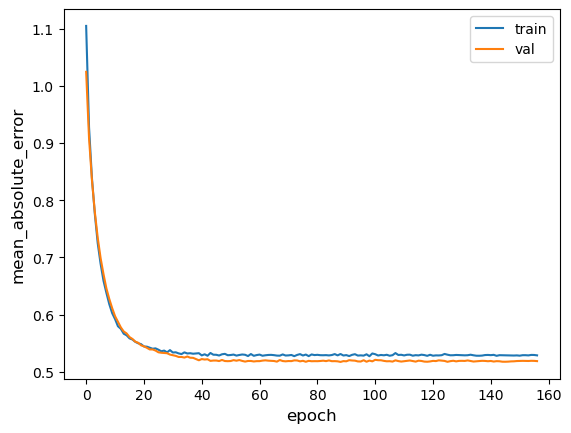

64/64 [==============================] - 0s 552us/step - loss: 0.8682 - mean_absolute_error: 0.5416
Test accuracy 0.5416366457939148
Test loss 0.8682118058204651


In [27]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [28]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [29]:
np.mean(y_test)

0.17904110510487864

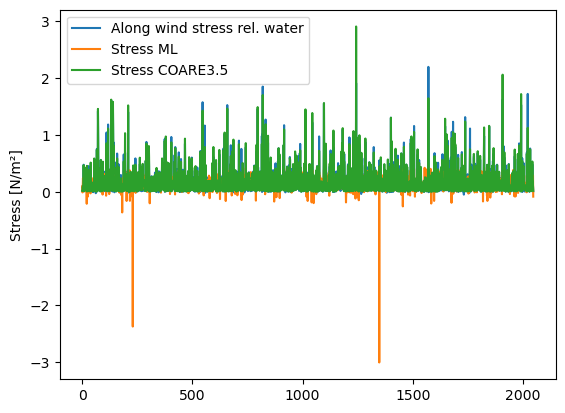

In [30]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

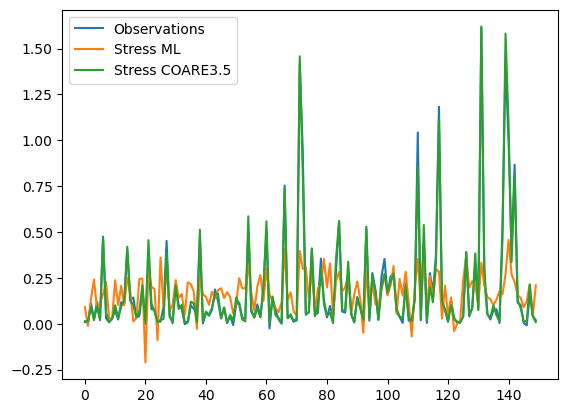

In [31]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

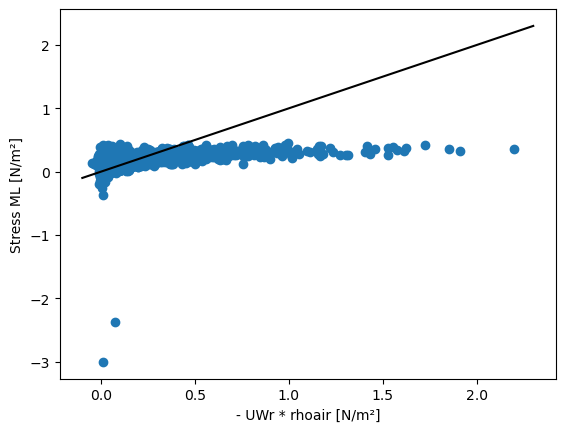

In [32]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

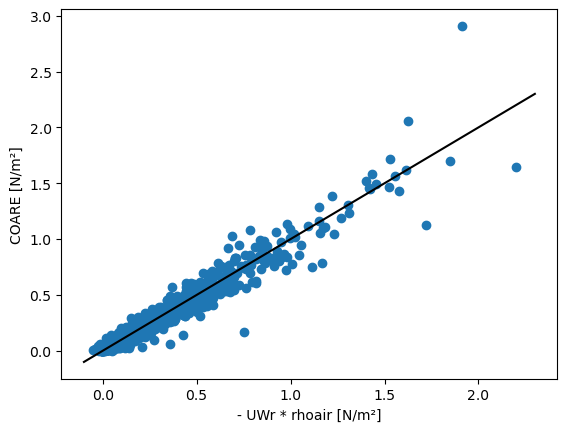

In [33]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [34]:
rmse(y_test.values, y_test_pred)

0.2773941173614866

In [35]:
rmse(y_test.values, c_test)

0.05591463795390357

## Correlation

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.42459401],
       [0.42459401, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

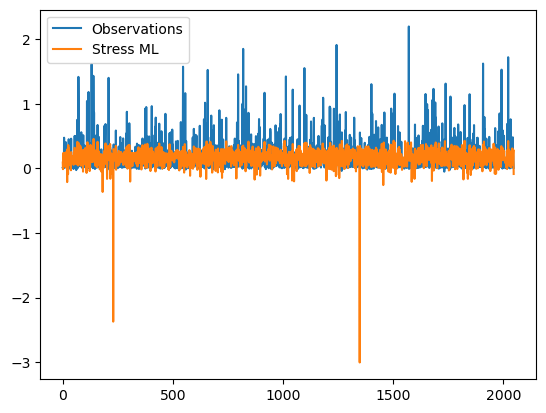

In [38]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [39]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.42459401],
       [0.42459401, 1.        ]])

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [41]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2773941173614866

## Correlation

In [42]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.42459401],
       [0.42459401, 1.        ]])

In [43]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

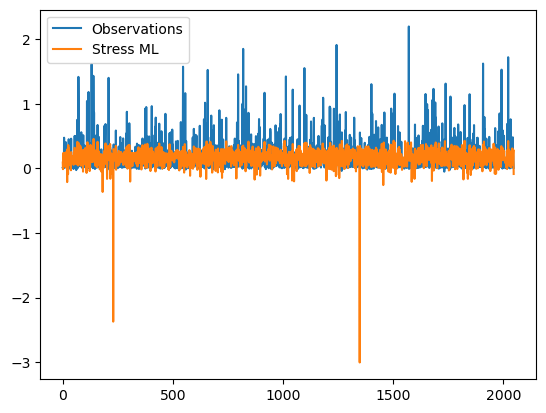

In [44]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [45]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.42459401],
       [0.42459401, 1.        ]])

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [47]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2773941173614866

# Other experiments

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 1ms/step - loss: 3.4819 - mean_absolute_error: 1.4342 - val_loss: 1.9226 - val_mean_absolute_error: 0.9468
Epoch 2/500
180/180 [==============================] - 0s 793us/step - loss: 1.5225 - mean_absolute_error: 0.8717 - val_loss: 1.0870 - val_mean_absolute_error: 0.7035
Epoch 3/500
180/180 [==============================] - 0s 803us/step - loss: 0.9851 - mean_absolute_error: 0.6524 - val_loss: 0.8575 - val_mean_absolute_error: 0.6129
Epoch 4/500
180/180 [==============================] - 0s 784us/step - loss: 0.7761 - mean_absolute_error: 0.5642 - val_loss: 0.7698 - val_mean_absolute_error: 0.5498
Epoch 5/500
180/180 [==============================] - 0s 780us/step - loss: 0.7182 - mean_absolute_error: 0.5322 - val_loss: 0.6967 - val_mean_absolute_error: 0.5090
Epoch 6/500
180/180 [==============================] - 0s 873us/step - loss: 0.6399 - mean_absolute_error: 0.5117 - val_loss: 0.6468 - val_mean_absolute_error: 0.4943


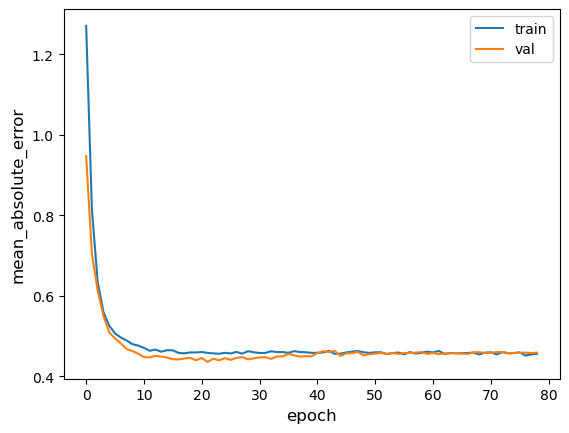

64/64 [==============================] - 0s 605us/step - loss: 0.6318 - mean_absolute_error: 0.4759
Test accuracy 0.47586238384246826
Test loss 0.6317808032035828


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

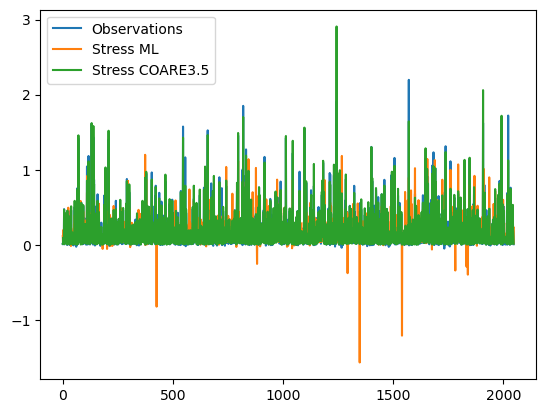

In [53]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

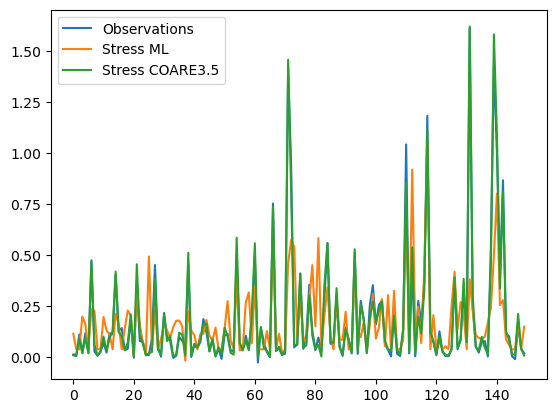

In [54]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [55]:
rmse(y_test.values, y_test_pred)

0.2989828592598191

## Correlation

In [56]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63134391],
       [0.63134391, 1.        ]])

In [57]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [58]:
y_test.values.shape

(2048,)

In [59]:
y_test_pred[:, 0].shape

(2048,)

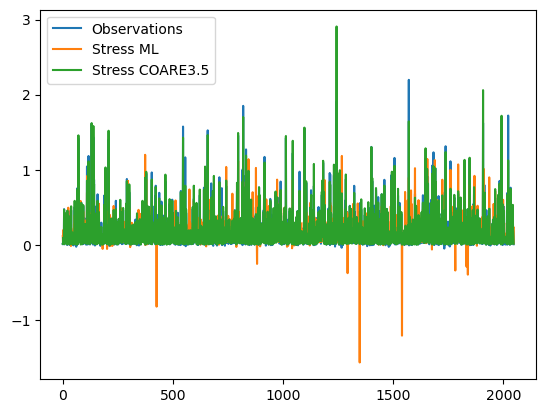

In [60]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

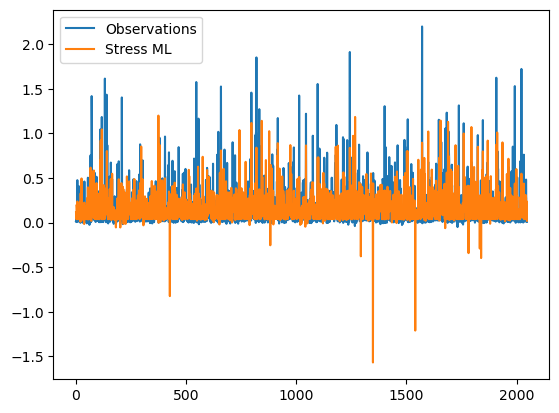

In [61]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [62]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [63]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2989828592598191

Text(0, 0.5, 'Stress ML [N/m²]')

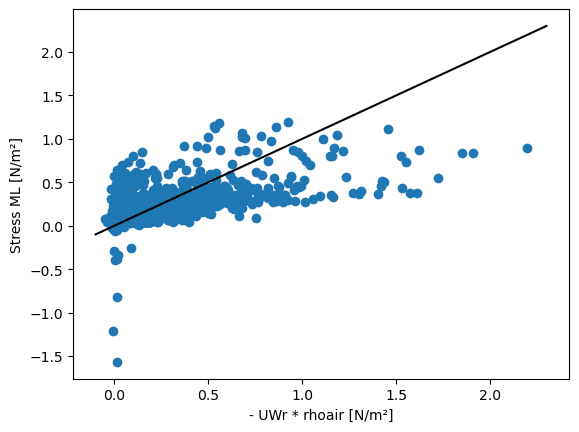

In [64]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [65]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [66]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [67]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 0s 2ms/step - loss: 4.1364 - mean_absolute_error: 1.4680 - val_loss: 1.9128 - val_mean_absolute_error: 0.8715
Epoch 2/500
90/90 [==============================] - 0s 987us/step - loss: 2.8208 - mean_absolute_error: 1.1920 - val_loss: 1.6836 - val_mean_absolute_error: 0.8258
Epoch 3/500
90/90 [==============================] - 0s 986us/step - loss: 2.0913 - mean_absolute_error: 1.0206 - val_loss: 1.6457 - val_mean_absolute_error: 0.7900
Epoch 4/500
90/90 [==============================] - 0s 897us/step - loss: 1.5995 - mean_absolute_error: 0.8999 - val_loss: 1.4971 - val_mean_absolute_error: 0.7287
Epoch 5/500
90/90 [==============================] - 0s 900us/step - loss: 1.3596 - mean_absolute_error: 0.8232 - val_loss: 1.3328 - val_mean_absolute_error: 0.6672
Epoch 6/500
90/90 [==============================] - 0s 950us/step - loss: 1.2941 - mean_absolute_error: 0.7866 - val_loss: 1.2020 - val_mean_absolute_error: 0.6275
Epoch 7/500


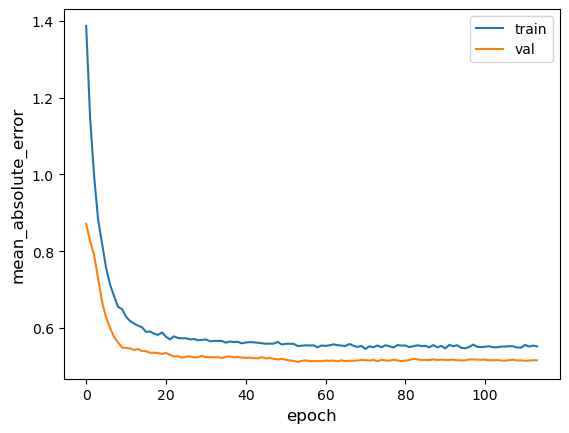

64/64 [==============================] - 0s 580us/step - loss: 0.8953 - mean_absolute_error: 0.5399
Test accuracy 0.5399443507194519
Test loss 0.8953043222427368


In [68]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [69]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [70]:
rmse(y_test.values, y_test_pred)

0.27673867547200737

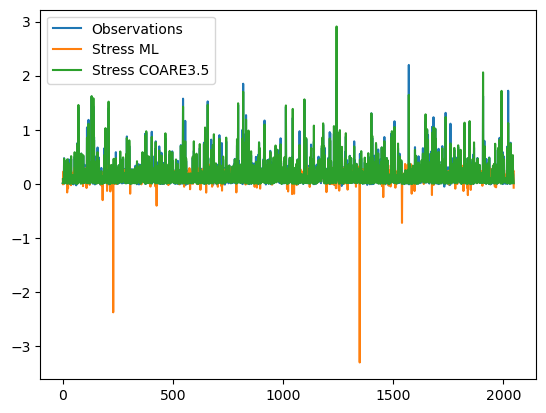

In [71]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

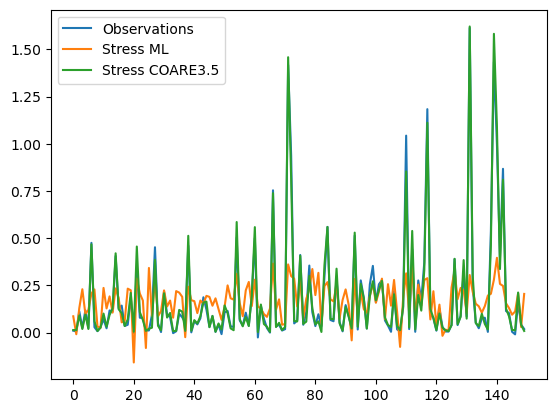

In [72]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

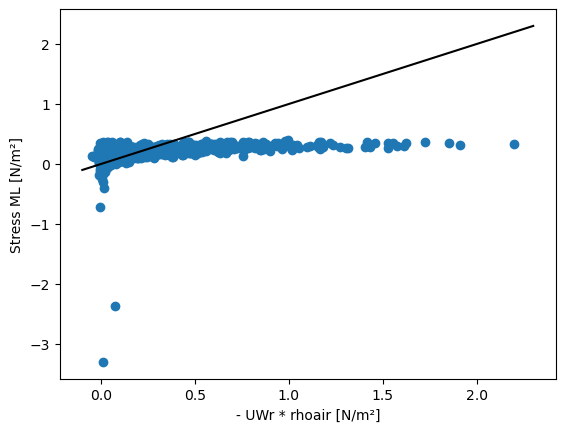

In [73]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [74]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.39994633],
       [0.39994633, 1.        ]])

In [75]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

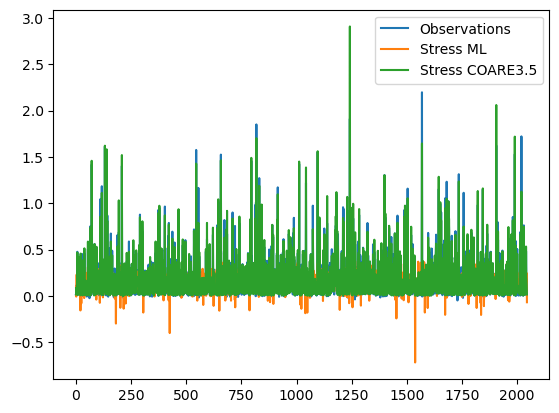

In [76]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

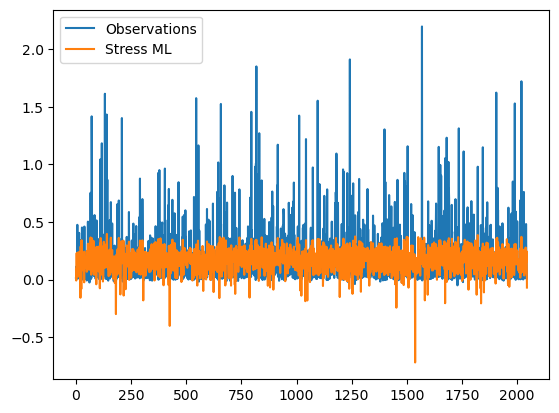

In [77]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [78]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97327294],
       [0.97327294, 1.        ]])

In [79]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2599003286801438

Text(0, 0.5, 'Stress ML [N/m²]')

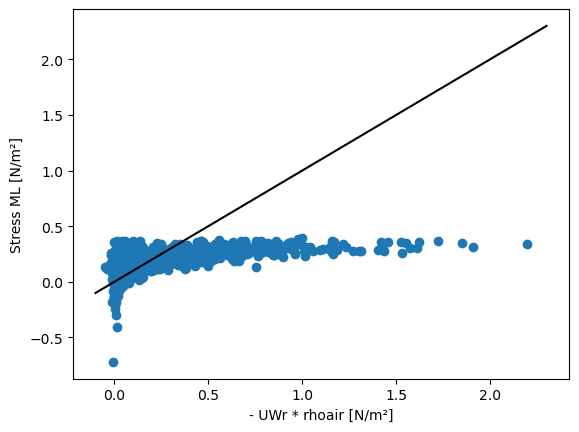

In [80]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [81]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [82]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [83]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 1ms/step - loss: 1.7507 - mean_absolute_error: 0.9467 - val_loss: 0.9517 - val_mean_absolute_error: 0.5964
Epoch 2/500
180/180 [==============================] - 0s 820us/step - loss: 0.9725 - mean_absolute_error: 0.6866 - val_loss: 0.7771 - val_mean_absolute_error: 0.5300
Epoch 3/500
180/180 [==============================] - 0s 788us/step - loss: 0.7848 - mean_absolute_error: 0.6035 - val_loss: 0.6878 - val_mean_absolute_error: 0.4943
Epoch 4/500
180/180 [==============================] - 0s 786us/step - loss: 0.7321 - mean_absolute_error: 0.5718 - val_loss: 0.6494 - val_mean_absolute_error: 0.4775
Epoch 5/500
180/180 [==============================] - 0s 828us/step - loss: 0.6807 - mean_absolute_error: 0.5413 - val_loss: 0.6239 - val_mean_absolute_error: 0.4714
Epoch 6/500
180/180 [==============================] - 0s 877us/step - loss: 0.6740 - mean_absolute_error: 0.5240 - val_loss: 0.6207 - val_mean_absolute_error: 0.4721


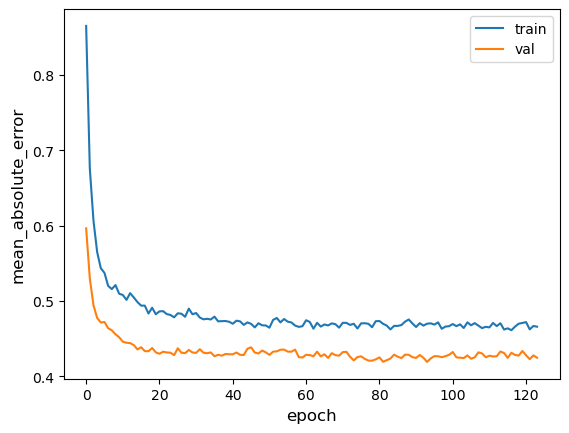

64/64 [==============================] - 0s 546us/step - loss: 0.7110 - mean_absolute_error: 0.4527
Test accuracy 0.45267459750175476
Test loss 0.7109946012496948


In [84]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [85]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [86]:
rmse(y_test.values, y_test_pred)

0.2941057633166637

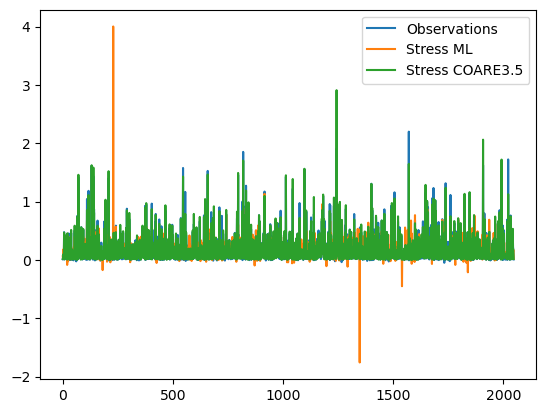

In [87]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

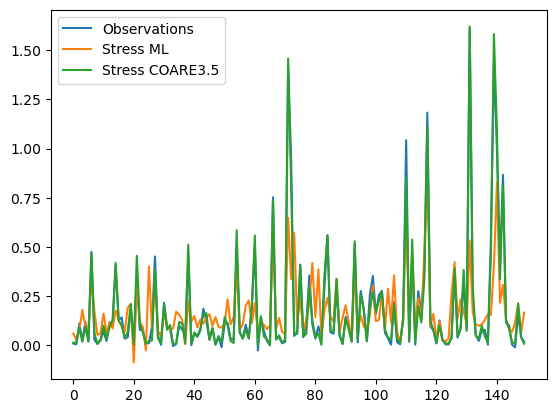

In [88]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

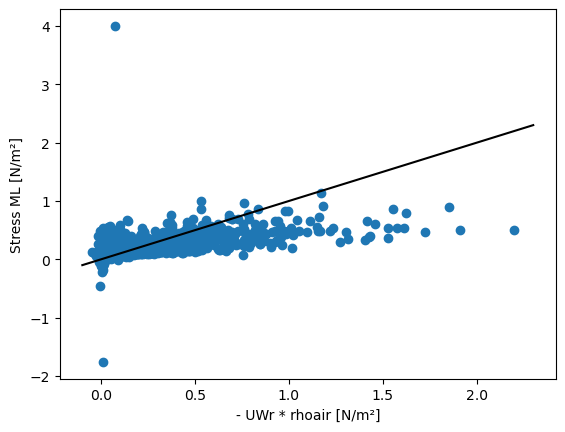

In [89]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [90]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.57235711],
       [0.57235711, 1.        ]])

In [91]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

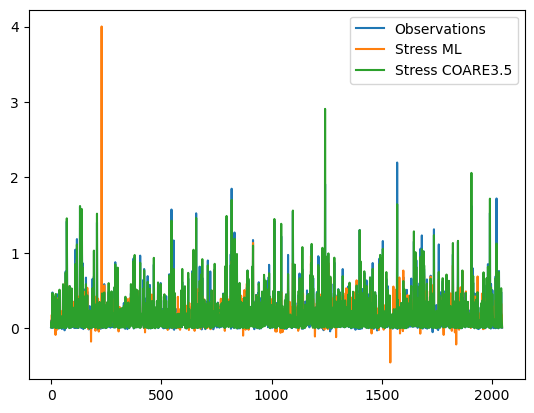

In [92]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

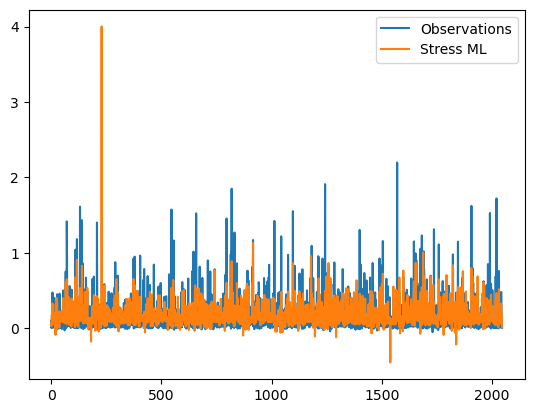

In [93]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [94]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97327419],
       [0.97327419, 1.        ]])

In [95]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.2910209568295442

Text(0, 0.5, 'Stress ML [N/m²]')

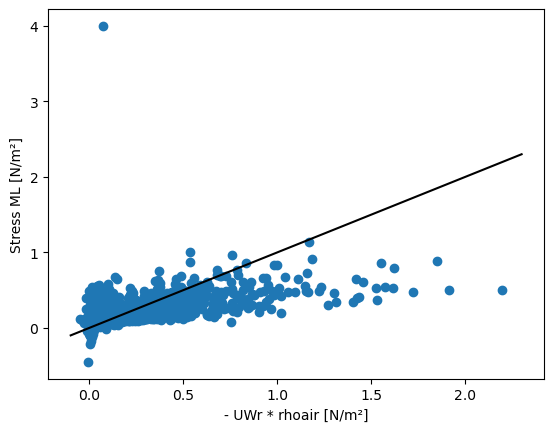

In [96]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [97]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [98]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [99]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 2ms/step - loss: 1.3742 - mean_absolute_error: 0.8366 - val_loss: 0.7519 - val_mean_absolute_error: 0.5346
Epoch 2/500
180/180 [==============================] - 0s 1ms/step - loss: 0.7947 - mean_absolute_error: 0.6441 - val_loss: 0.5644 - val_mean_absolute_error: 0.4521
Epoch 3/500
180/180 [==============================] - 0s 1ms/step - loss: 0.7259 - mean_absolute_error: 0.6076 - val_loss: 0.5389 - val_mean_absolute_error: 0.4412
Epoch 4/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6702 - mean_absolute_error: 0.5588 - val_loss: 0.5035 - val_mean_absolute_error: 0.4253
Epoch 5/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6426 - mean_absolute_error: 0.5269 - val_loss: 0.5079 - val_mean_absolute_error: 0.4342
Epoch 6/500
180/180 [==============================] - 0s 1ms/step - loss: 0.5596 - mean_absolute_error: 0.4927 - val_loss: 0.4888 - val_mean_absolute_error: 0.4211
Epoch 7/50

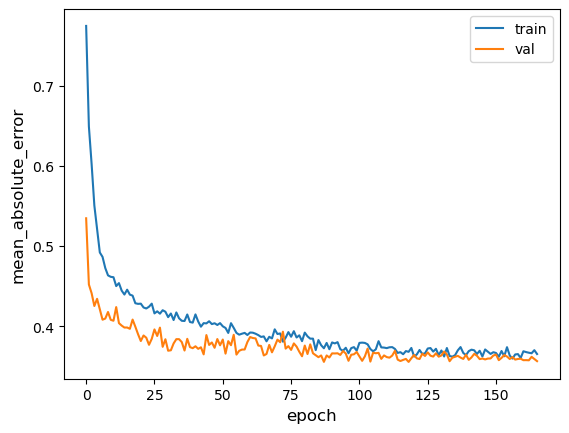

64/64 [==============================] - 0s 600us/step - loss: 1.9996 - mean_absolute_error: 0.3964
Test accuracy 0.39636102318763733
Test loss 1.999612808227539


In [100]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [101]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [102]:
rmse(y_test.values, y_test_pred)

0.4235811972894221

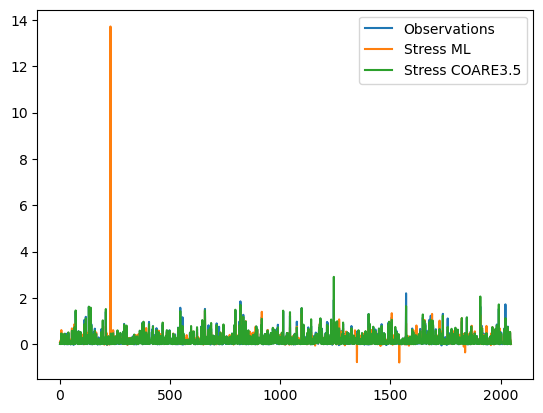

In [103]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

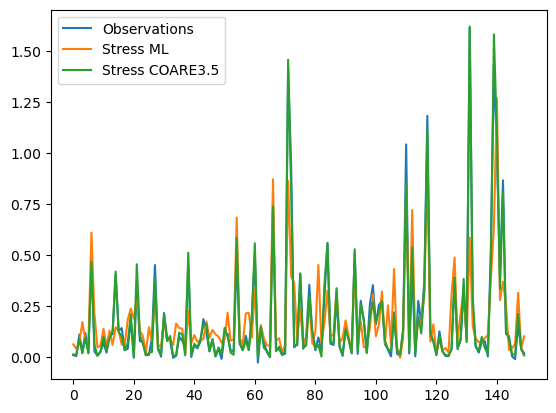

In [104]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

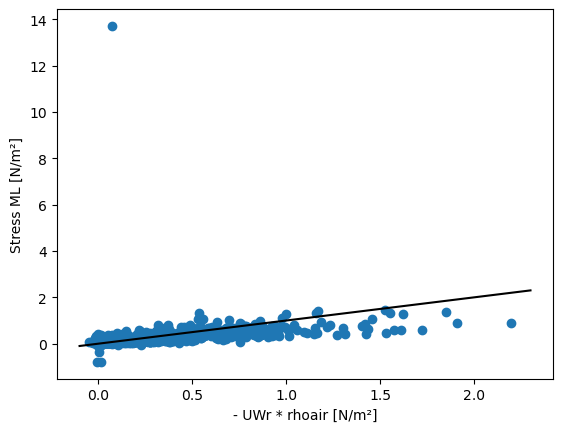

In [105]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [106]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.39626136],
       [0.39626136, 1.        ]])

In [107]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

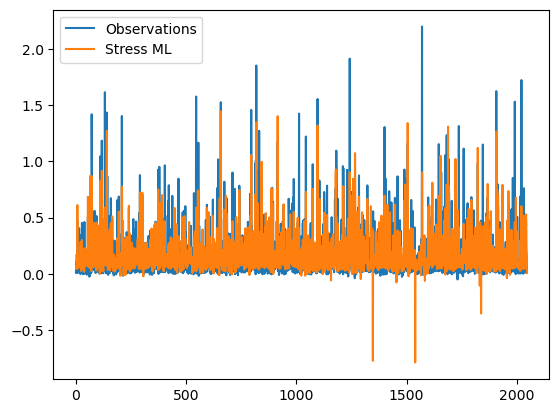

In [108]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [109]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97327928],
       [0.97327928, 1.        ]])

In [110]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.2999404096236829

Text(0, 0.5, 'Stress ML [N/m²]')

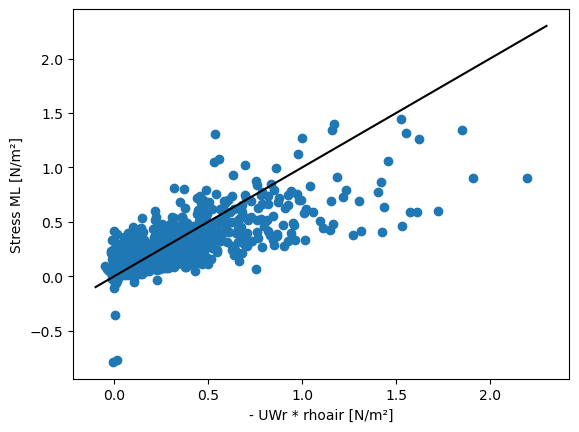

In [111]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [112]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.39626136],
       [0.39626136, 1.        ]])

In [113]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [114]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [115]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [116]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 5ms/step - loss: 2.6415 - mean_absolute_error: 1.1944 - val_loss: 0.8207 - val_mean_absolute_error: 0.5786
Epoch 2/500
180/180 [==============================] - 1s 4ms/step - loss: 0.8660 - mean_absolute_error: 0.6775 - val_loss: 0.6654 - val_mean_absolute_error: 0.4949
Epoch 3/500
180/180 [==============================] - 1s 4ms/step - loss: 0.7340 - mean_absolute_error: 0.6065 - val_loss: 0.6422 - val_mean_absolute_error: 0.5352
Epoch 4/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6735 - mean_absolute_error: 0.5727 - val_loss: 0.5084 - val_mean_absolute_error: 0.4415
Epoch 5/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5240 - mean_absolute_error: 0.4971 - val_loss: 0.4623 - val_mean_absolute_error: 0.4364
Epoch 6/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5204 - mean_absolute_error: 0.4888 - val_loss: 0.4550 - val_mean_absolute_error: 0.4141
Epoch 7/50

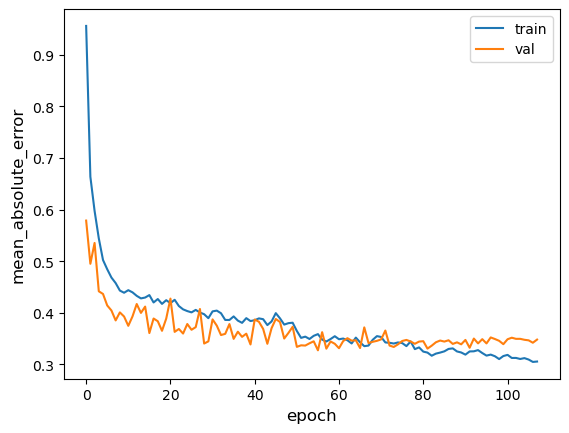

64/64 [==============================] - 0s 951us/step - loss: 1.3675 - mean_absolute_error: 0.3672
Test accuracy 0.36724284291267395
Test loss 1.3674657344818115


In [117]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [118]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [119]:
rmse(y_test.values, y_test_pred)

0.38929097976738336

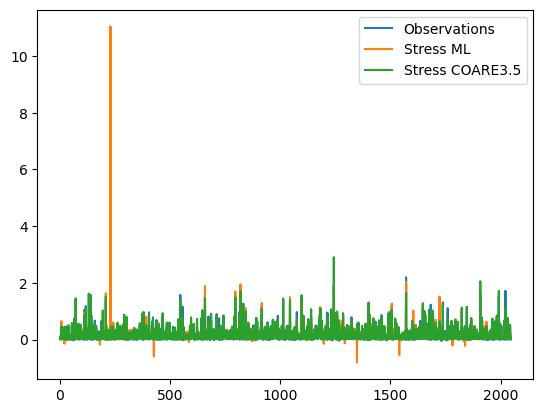

In [120]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

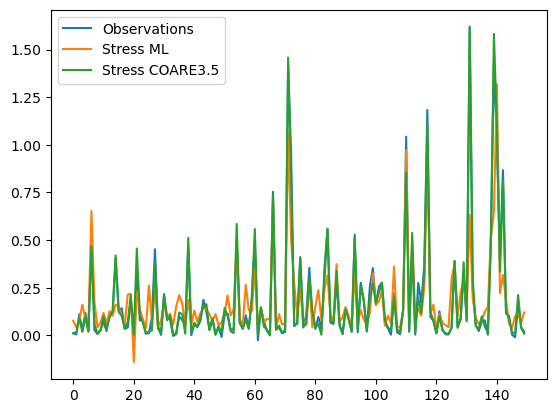

In [121]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [122]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.50449482],
       [0.50449482, 1.        ]])

In [123]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

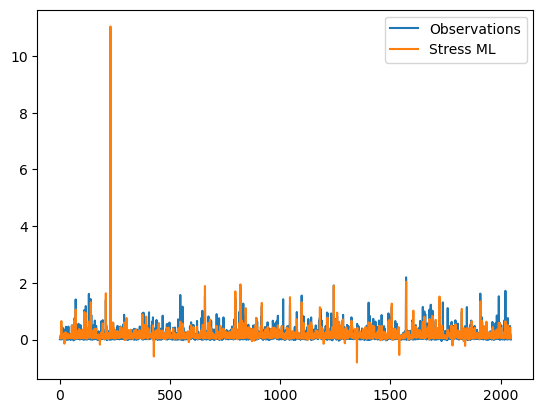

In [124]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [125]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [126]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.38929097976738336

Text(0, 0.5, 'Stress ML [N/m²]')

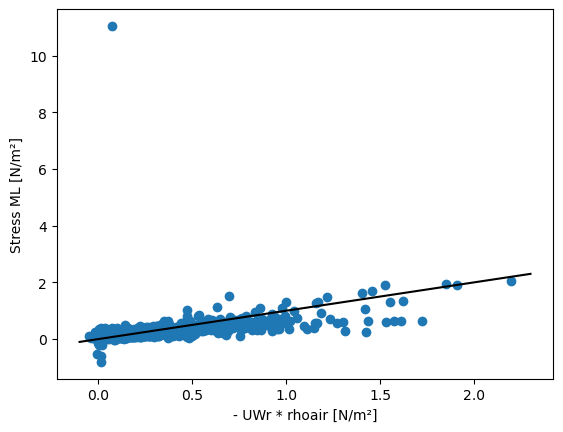

In [127]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [128]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [129]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [130]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 3s 12ms/step - loss: 3.1676 - mean_absolute_error: 1.2029 - val_loss: 0.8788 - val_mean_absolute_error: 0.6712
Epoch 2/500
180/180 [==============================] - 2s 11ms/step - loss: 0.9916 - mean_absolute_error: 0.7329 - val_loss: 0.7600 - val_mean_absolute_error: 0.6253
Epoch 3/500
180/180 [==============================] - 2s 11ms/step - loss: 0.7966 - mean_absolute_error: 0.6452 - val_loss: 0.5285 - val_mean_absolute_error: 0.4579
Epoch 4/500
180/180 [==============================] - 2s 11ms/step - loss: 0.6206 - mean_absolute_error: 0.5581 - val_loss: 0.4646 - val_mean_absolute_error: 0.4158
Epoch 5/500
180/180 [==============================] - 2s 11ms/step - loss: 0.5828 - mean_absolute_error: 0.5321 - val_loss: 0.4213 - val_mean_absolute_error: 0.4178
Epoch 6/500
180/180 [==============================] - 2s 12ms/step - loss: 0.5016 - mean_absolute_error: 0.4864 - val_loss: 0.4964 - val_mean_absolute_error: 0.4216
Epoc

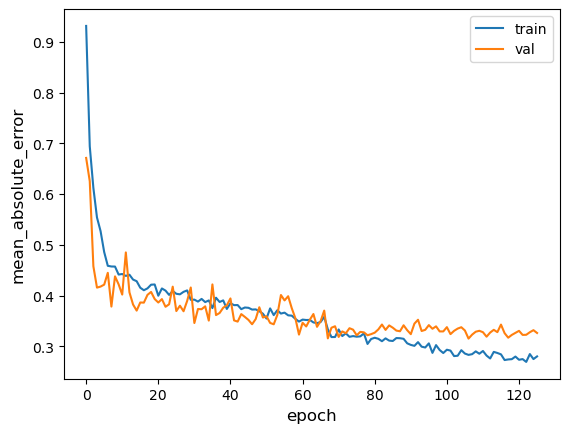

64/64 [==============================] - 0s 3ms/step - loss: 0.5620 - mean_absolute_error: 0.3330
Test accuracy 0.33303138613700867
Test loss 0.5620486736297607


In [131]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [132]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [133]:
rmse(y_test.values, y_test_pred)

0.33418637539739404

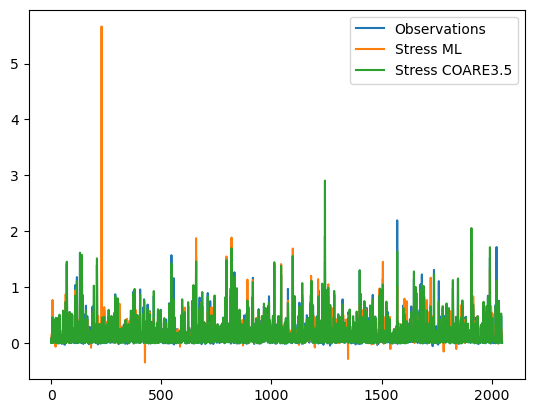

In [134]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

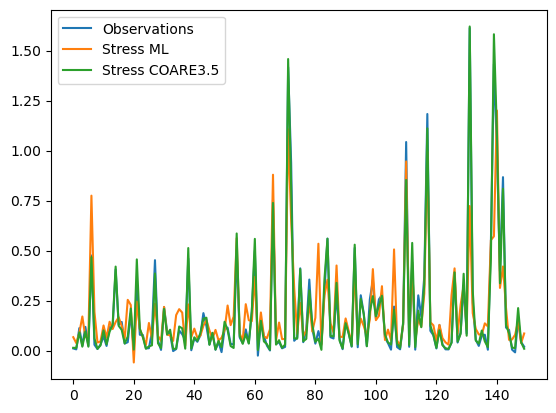

In [135]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [136]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.71680436],
       [0.71680436, 1.        ]])

In [137]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

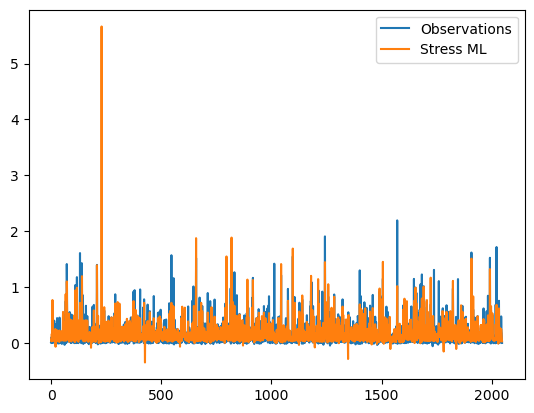

In [138]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [139]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [140]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.33418637539739404

Text(0, 0.5, 'Stress ML [N/m²]')

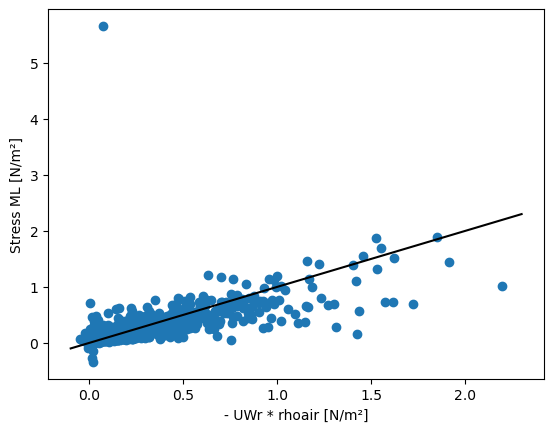

In [141]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

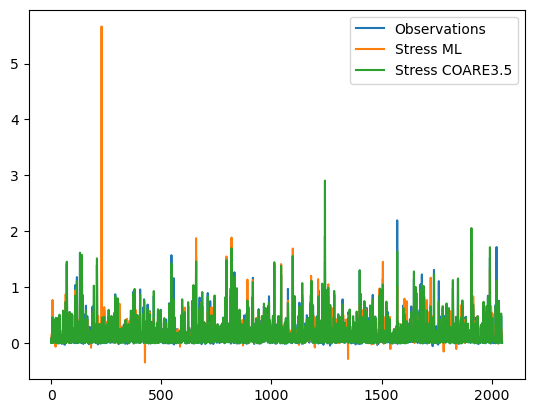

In [142]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

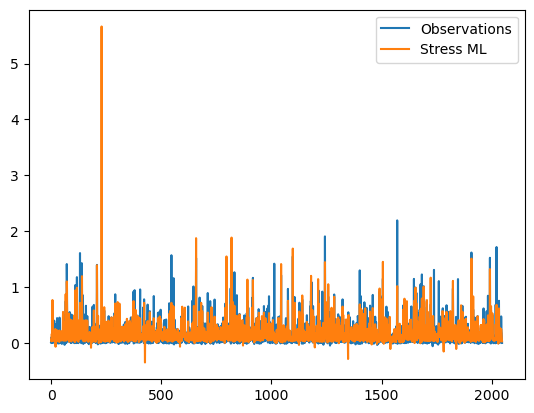

In [143]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [144]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.71680436],
       [0.71680436, 1.        ]])

In [145]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [146]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.33418637539739404

Text(0, 0.5, 'Stress ML [N/m²]')

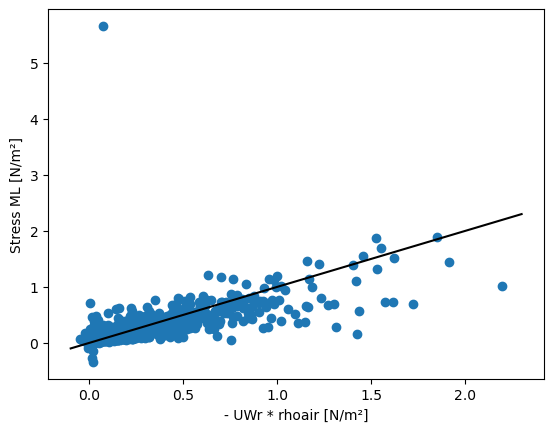

In [147]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

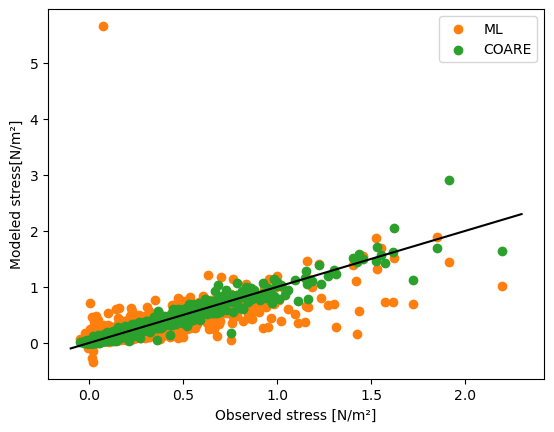

In [148]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

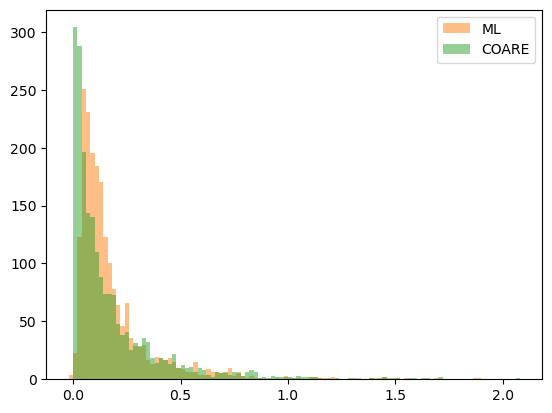

In [149]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

In [150]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [151]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [152]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 38ms/step - loss: 11.5122 - mean_absolute_error: 2.2257 - val_loss: 0.9698 - val_mean_absolute_error: 0.6563
Epoch 2/500
12/12 [==============================] - 0s 28ms/step - loss: 2.0005 - mean_absolute_error: 0.9622 - val_loss: 0.9265 - val_mean_absolute_error: 0.6012
Epoch 3/500
12/12 [==============================] - 0s 29ms/step - loss: 1.3869 - mean_absolute_error: 0.8152 - val_loss: 0.9616 - val_mean_absolute_error: 0.6258
Epoch 4/500
12/12 [==============================] - 0s 29ms/step - loss: 1.0428 - mean_absolute_error: 0.7275 - val_loss: 0.8886 - val_mean_absolute_error: 0.6028
Epoch 5/500
12/12 [==============================] - 0s 29ms/step - loss: 0.9379 - mean_absolute_error: 0.6668 - val_loss: 0.9104 - val_mean_absolute_error: 0.6368
Epoch 6/500
12/12 [==============================] - 0s 29ms/step - loss: 0.8923 - mean_absolute_error: 0.6602 - val_loss: 0.8989 - val_mean_absolute_error: 0.6173
Epoch 7/500
12/

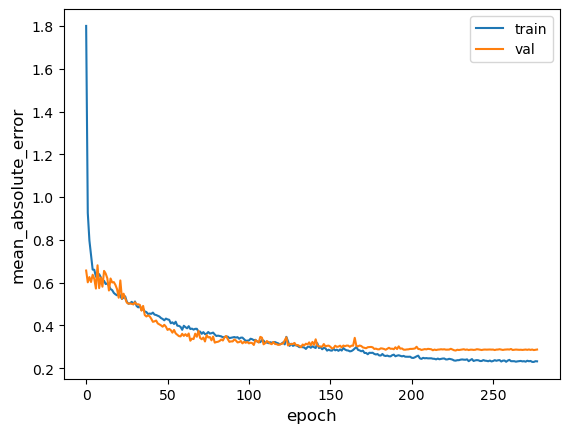

64/64 [==============================] - 0s 3ms/step - loss: 0.2585 - mean_absolute_error: 0.2901
Test accuracy 0.29012858867645264
Test loss 0.2585032880306244


In [153]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [154]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [155]:
rmse(y_test.values, y_test_pred)

0.32364102842744086

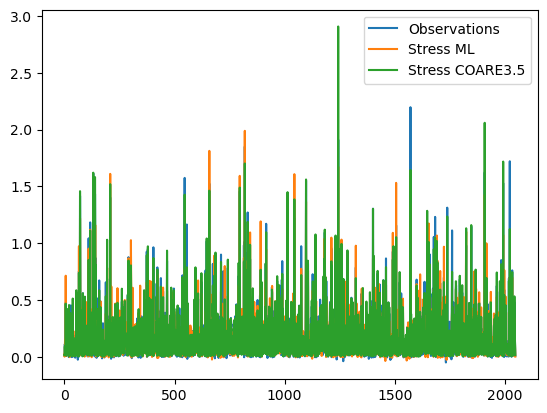

In [156]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

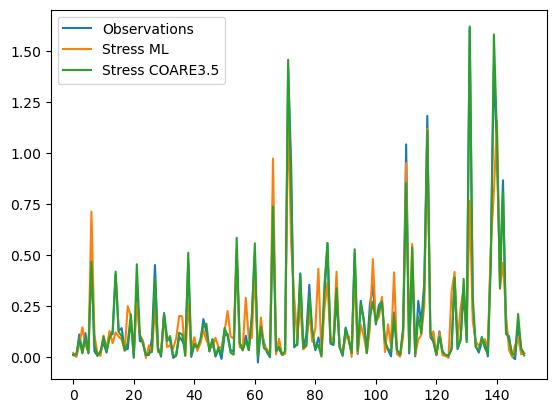

In [157]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [158]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86691182],
       [0.86691182, 1.        ]])

In [159]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

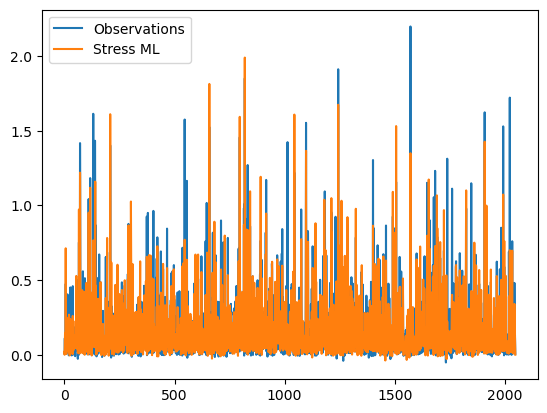

In [160]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [161]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [162]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.32364102842744086

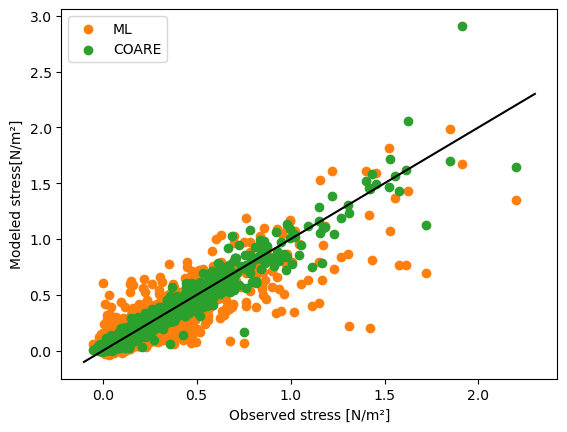

In [163]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

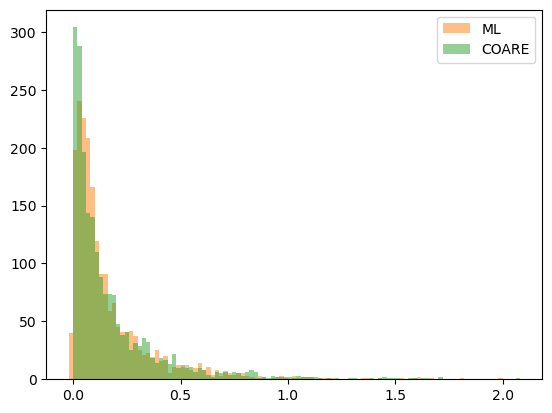

In [164]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [165]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [166]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [167]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 38ms/step - loss: 15.6427 - mean_absolute_error: 2.5254 - val_loss: 1.0266 - val_mean_absolute_error: 0.6681
Epoch 2/500
12/12 [==============================] - 0s 28ms/step - loss: 1.8018 - mean_absolute_error: 0.9876 - val_loss: 0.9417 - val_mean_absolute_error: 0.6431
Epoch 3/500
12/12 [==============================] - 0s 29ms/step - loss: 1.3156 - mean_absolute_error: 0.8131 - val_loss: 0.8909 - val_mean_absolute_error: 0.5794
Epoch 4/500
12/12 [==============================] - 0s 38ms/step - loss: 1.2537 - mean_absolute_error: 0.7741 - val_loss: 0.9652 - val_mean_absolute_error: 0.5989
Epoch 5/500
12/12 [==============================] - 0s 32ms/step - loss: 0.9633 - mean_absolute_error: 0.6975 - val_loss: 0.9570 - val_mean_absolute_error: 0.5656
Epoch 6/500
12/12 [==============================] - 0s 29ms/step - loss: 0.9279 - mean_absolute_error: 0.6833 - val_loss: 0.9185 - val_mean_absolute_error: 0.5564
Epoch 7/500
12/

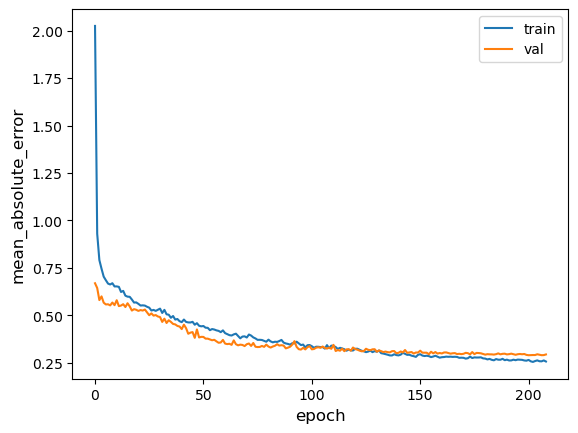

64/64 [==============================] - 0s 2ms/step - loss: 0.2804 - mean_absolute_error: 0.2996
Test accuracy 0.29964250326156616
Test loss 0.28042879700660706


In [168]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [169]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [170]:
rmse(y_test.values, y_test_pred)

0.3186753704796917

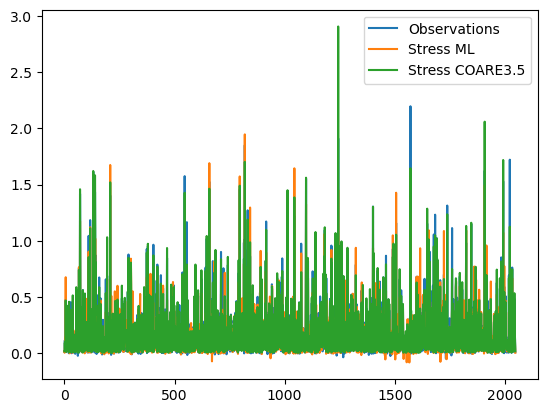

In [171]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

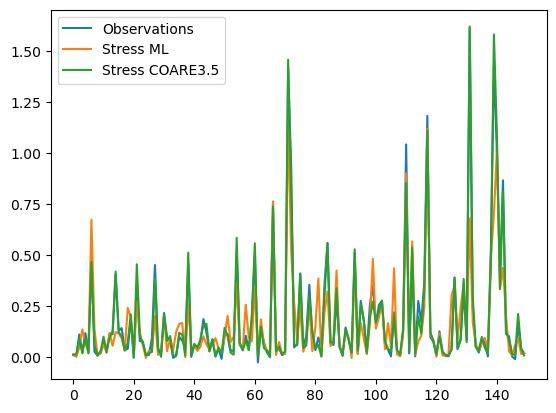

In [172]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [173]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85740067],
       [0.85740067, 1.        ]])

In [174]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

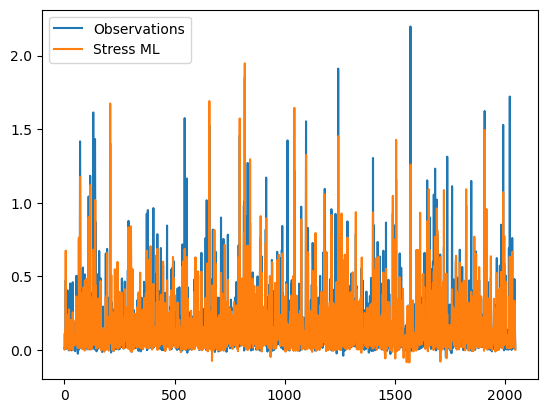

In [175]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [176]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [177]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3186753704796917

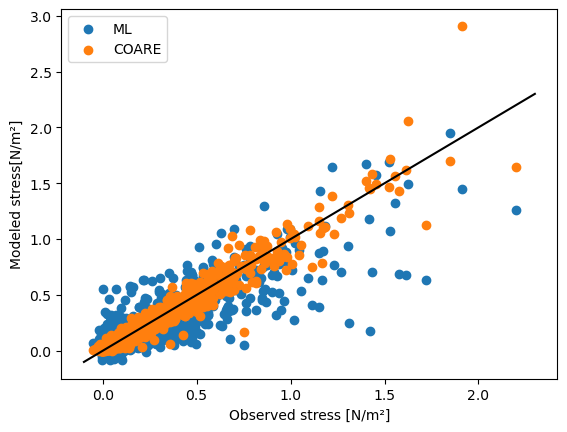

In [178]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

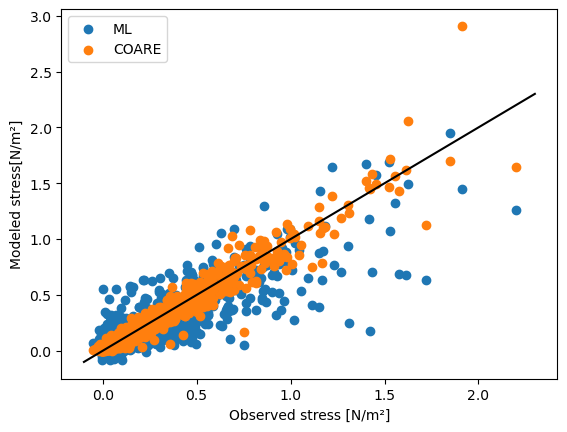

In [179]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [180]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [181]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [182]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 1s 124ms/step - loss: 16.6763 - mean_absolute_error: 2.4663 - val_loss: 0.9760 - val_mean_absolute_error: 0.6292
Epoch 2/500
6/6 [==============================] - 1s 103ms/step - loss: 2.2322 - mean_absolute_error: 1.1403 - val_loss: 0.9955 - val_mean_absolute_error: 0.6093
Epoch 3/500
6/6 [==============================] - 1s 108ms/step - loss: 1.5593 - mean_absolute_error: 0.8668 - val_loss: 0.9541 - val_mean_absolute_error: 0.5578
Epoch 4/500
6/6 [==============================] - 1s 101ms/step - loss: 1.3642 - mean_absolute_error: 0.7974 - val_loss: 0.9545 - val_mean_absolute_error: 0.6070
Epoch 5/500
6/6 [==============================] - 1s 102ms/step - loss: 1.2711 - mean_absolute_error: 0.7612 - val_loss: 0.9342 - val_mean_absolute_error: 0.5509
Epoch 6/500
6/6 [==============================] - 1s 102ms/step - loss: 1.0856 - mean_absolute_error: 0.7353 - val_loss: 0.9278 - val_mean_absolute_error: 0.5777
Epoch 7/500
6/6 [====

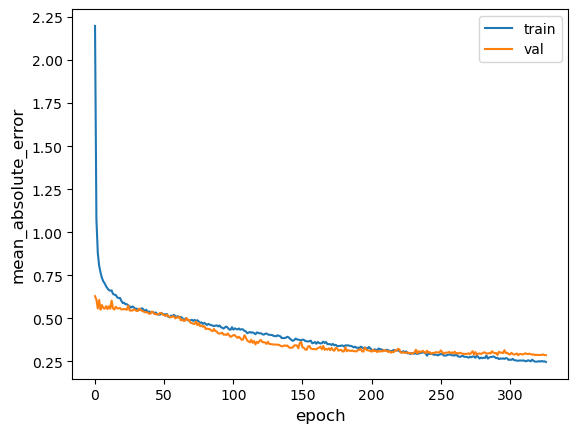

64/64 [==============================] - 1s 9ms/step - loss: 0.2667 - mean_absolute_error: 0.2914
Test accuracy 0.2913515865802765
Test loss 0.26669737696647644


In [183]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [184]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [185]:
rmse(y_test.values, y_test_pred)

0.31784655972654824

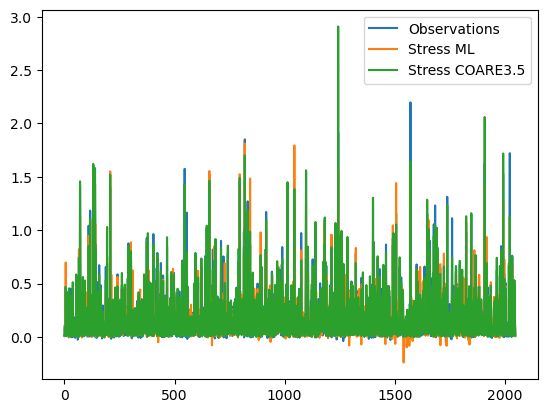

In [186]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

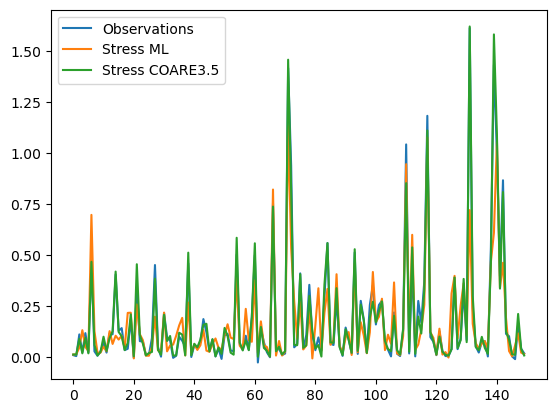

In [187]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [188]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86464947],
       [0.86464947, 1.        ]])

In [189]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

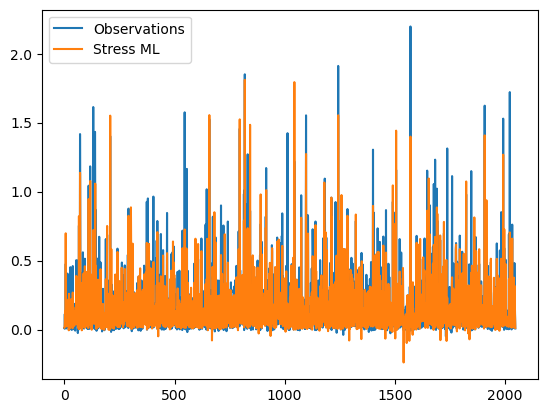

In [190]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [191]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [192]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.31784655972654824

Text(0, 0.5, 'Stress ML [N/m²]')

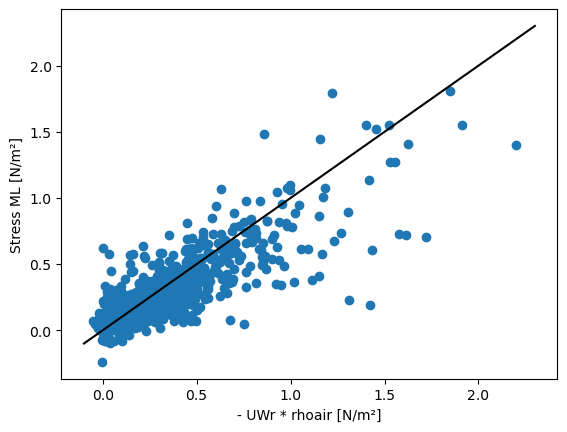

In [193]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

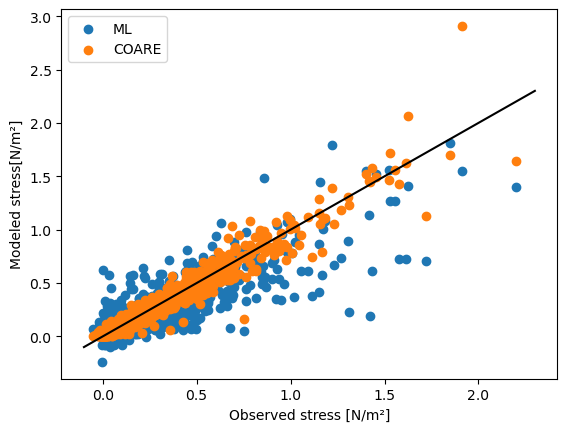

In [194]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [195]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [196]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [197]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 591ms/step - loss: 17.2879 - mean_absolute_error: 2.6758 - val_loss: 1.0617 - val_mean_absolute_error: 0.6276
Epoch 2/1000
3/3 [==============================] - 2s 545ms/step - loss: 3.3593 - mean_absolute_error: 1.3522 - val_loss: 1.0422 - val_mean_absolute_error: 0.6668
Epoch 3/1000
3/3 [==============================] - 2s 533ms/step - loss: 1.9414 - mean_absolute_error: 1.0057 - val_loss: 1.1944 - val_mean_absolute_error: 0.5751
Epoch 4/1000
3/3 [==============================] - 2s 559ms/step - loss: 1.7905 - mean_absolute_error: 0.9183 - val_loss: 1.3874 - val_mean_absolute_error: 0.7580
Epoch 5/1000
3/3 [==============================] - 2s 549ms/step - loss: 1.5538 - mean_absolute_error: 0.8739 - val_loss: 2.4536 - val_mean_absolute_error: 1.2049
Epoch 6/1000
3/3 [==============================] - 2s 545ms/step - loss: 1.3322 - mean_absolute_error: 0.8298 - val_loss: 2.8231 - val_mean_absolute_error: 1.3550
Epoch 7/1000
3/

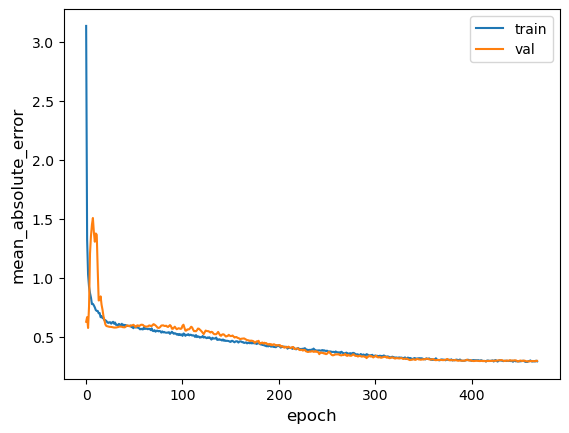

64/64 [==============================] - 2s 25ms/step - loss: 0.2788 - mean_absolute_error: 0.2994
Test accuracy 0.29937300086021423
Test loss 0.2788071632385254


In [198]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [199]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [200]:
rmse(y_test.values, y_test_pred)

0.32089202454378357

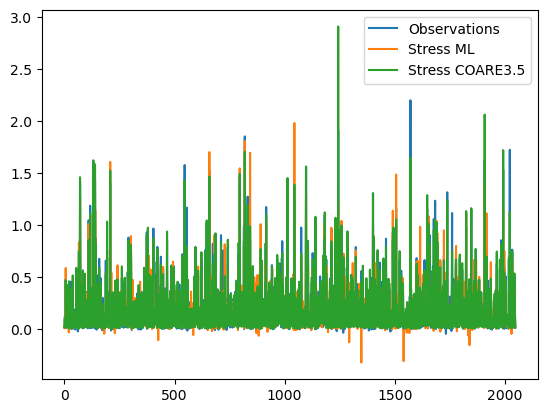

In [201]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

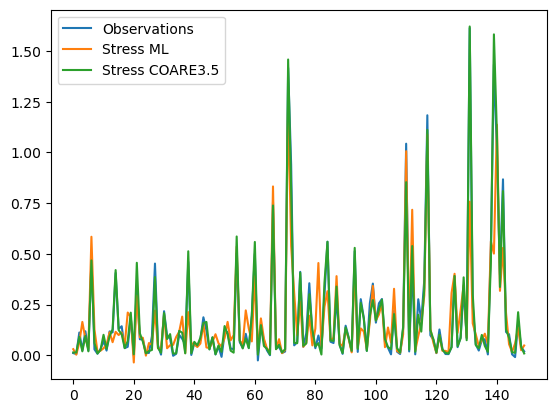

In [202]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [203]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85665412],
       [0.85665412, 1.        ]])

In [204]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

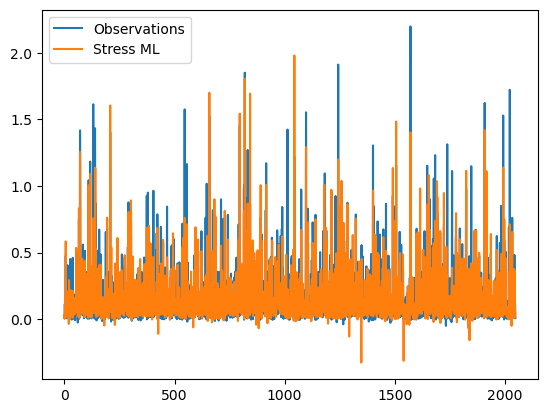

In [205]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [206]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [207]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.32089202454378357

Text(0, 0.5, 'Stress ML [N/m²]')

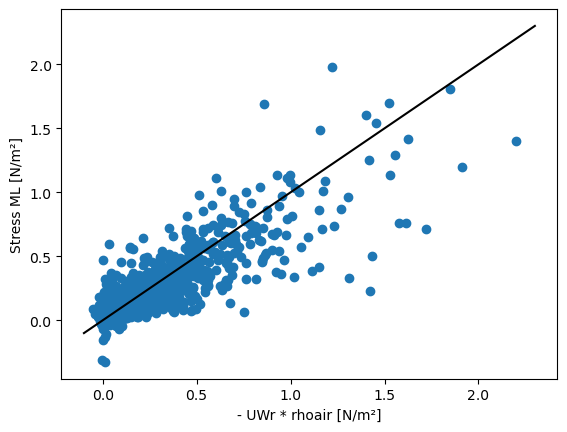

In [208]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [209]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [210]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [211]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 2s 556ms/step - loss: 23.1283 - mean_absolute_error: 3.1515 - val_loss: 1.2722 - val_mean_absolute_error: 0.6673
Epoch 2/1000
3/3 [==============================] - 1s 498ms/step - loss: 3.0721 - mean_absolute_error: 1.3813 - val_loss: 1.6666 - val_mean_absolute_error: 0.7550
Epoch 3/1000
3/3 [==============================] - 1s 495ms/step - loss: 2.2761 - mean_absolute_error: 1.1206 - val_loss: 1.7597 - val_mean_absolute_error: 0.7743
Epoch 4/1000
3/3 [==============================] - 1s 498ms/step - loss: 1.7415 - mean_absolute_error: 0.9492 - val_loss: 0.9733 - val_mean_absolute_error: 0.6844
Epoch 5/1000
3/3 [==============================] - 1s 490ms/step - loss: 1.5139 - mean_absolute_error: 0.8796 - val_loss: 1.1521 - val_mean_absolute_error: 0.7047
Epoch 6/1000
3/3 [==============================] - 1s 495ms/step - loss: 1.5408 - mean_absolute_error: 0.8537 - val_loss: 2.5380 - val_mean_absolute_error: 0.9131
Epoch 7/1000
3/

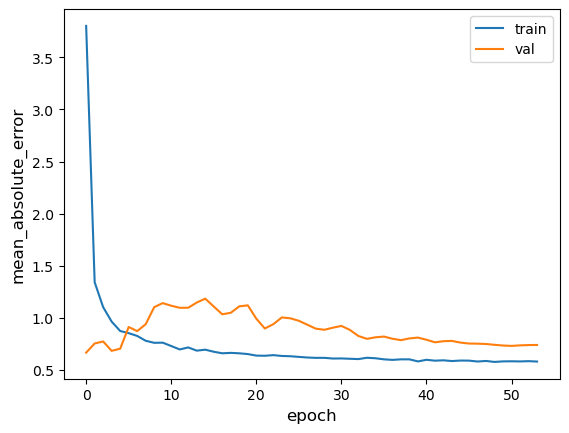

64/64 [==============================] - 2s 25ms/step - loss: 0.9858 - mean_absolute_error: 0.7378
Test accuracy 0.7377728819847107
Test loss 0.9858372211456299


In [212]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [213]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [214]:
rmse(y_test.values, y_test_pred)

0.25097739021366644

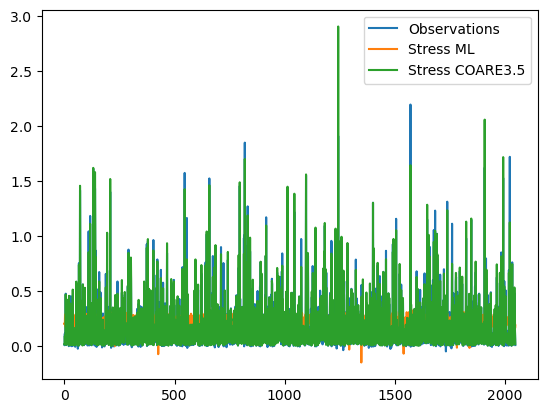

In [215]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

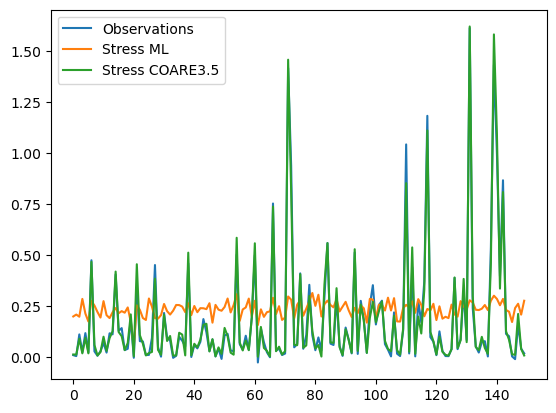

In [216]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [217]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.37664269],
       [0.37664269, 1.        ]])

In [218]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

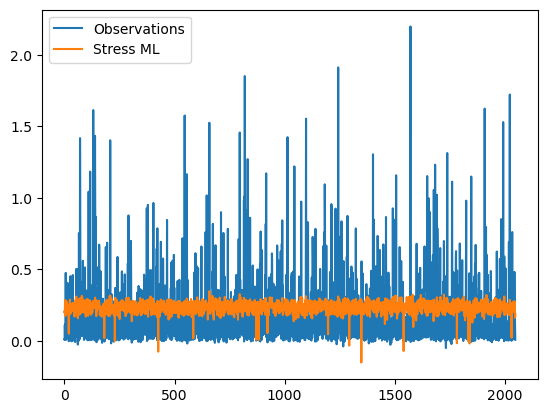

In [219]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [220]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

In [221]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.25097739021366644

Text(0, 0.5, 'Stress ML [N/m²]')

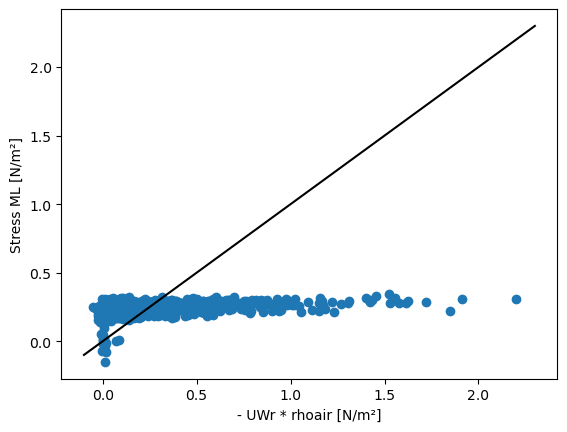

In [222]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [223]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [224]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [225]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 617ms/step - loss: 18.2837 - mean_absolute_error: 3.0632 - val_loss: 1.2732 - val_mean_absolute_error: 0.7189
Epoch 2/1000
3/3 [==============================] - 2s 534ms/step - loss: 3.0756 - mean_absolute_error: 1.3270 - val_loss: 1.6106 - val_mean_absolute_error: 0.7156
Epoch 3/1000
3/3 [==============================] - 2s 538ms/step - loss: 1.9063 - mean_absolute_error: 1.0067 - val_loss: 2.8022 - val_mean_absolute_error: 0.7469
Epoch 4/1000
3/3 [==============================] - 2s 549ms/step - loss: 1.6259 - mean_absolute_error: 0.8634 - val_loss: 3.7944 - val_mean_absolute_error: 0.8457
Epoch 5/1000
3/3 [==============================] - 2s 543ms/step - loss: 1.5274 - mean_absolute_error: 0.8544 - val_loss: 1.0371 - val_mean_absolute_error: 0.5771
Epoch 6/1000
3/3 [==============================] - 2s 532ms/step - loss: 1.3668 - mean_absolute_error: 0.7937 - val_loss: 1.5965 - val_mean_absolute_error: 0.6100
Epoch 7/1000
3/

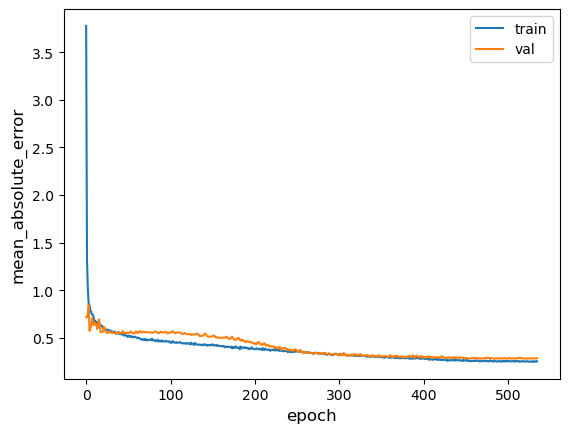

64/64 [==============================] - 2s 24ms/step - loss: 2.2900 - mean_absolute_error: 1.0971
Test accuracy 1.097071647644043
Test loss 2.2899703979492188


In [226]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [227]:
y_test_pred = multi_dense_model.predict(x_test)

In [228]:
rmse(y_test.values, y_test_pred)

1.59148190052152

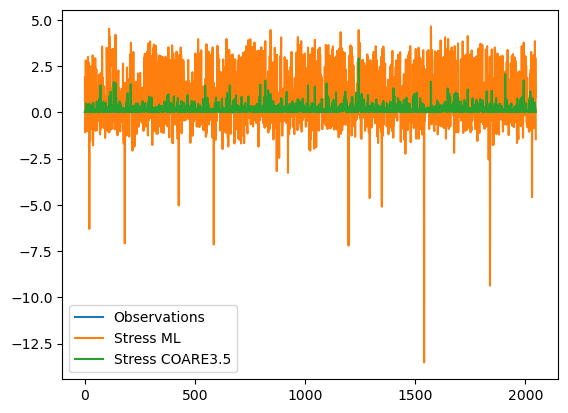

In [229]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

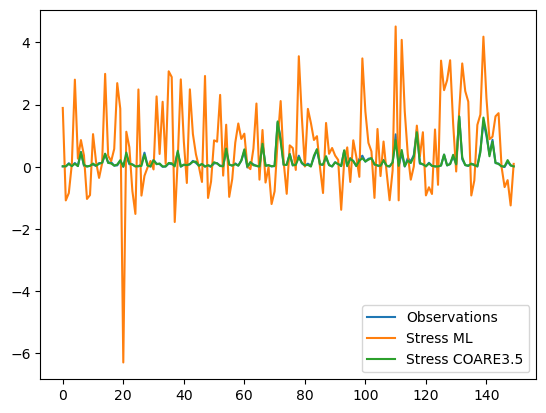

In [230]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [231]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.3449289],
       [0.3449289, 1.       ]])

In [232]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97328052],
       [0.97328052, 1.        ]])

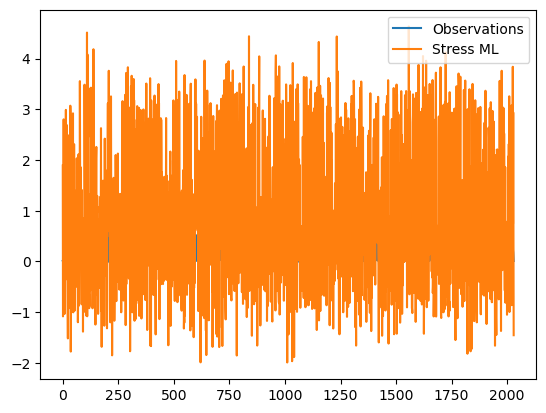

In [233]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [234]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.       , 0.9731677],
       [0.9731677, 1.       ]])

In [235]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

1.495561738111255

Text(0, 0.5, 'Stress ML [N/m²]')

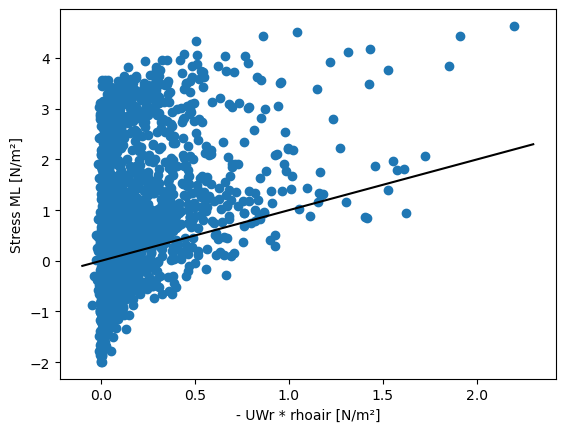

In [236]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 